In [1]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hypertension,Fatigue,Gastrointestinal,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


In [4]:
for i in data.columns:
    data[i]=data[i].replace({'Yes':1,'No':0})

C:\Users\tr4k\AppData\Local\Temp\ipykernel_19976\3332186561.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i]=data[i].replace({'Yes':1,'No':0})


In [6]:
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hypertension,Fatigue,Gastrointestinal,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Breathing Problem     5434 non-null   int64
 1   Fever                 5434 non-null   int64
 2   Dry Cough             5434 non-null   int64
 3   Sore throat           5434 non-null   int64
 4   Running Nose          5434 non-null   int64
 5   Asthma                5434 non-null   int64
 6   Chronic Lung Disease  5434 non-null   int64
 7   Headache              5434 non-null   int64
 8   Heart Disease         5434 non-null   int64
 9   Diabetes              5434 non-null   int64
 10  Hypertension          5434 non-null   int64
 11  Fatigue               5434 non-null   int64
 12  Gastrointestinal      5434 non-null   int64
 13  COVID-19              5434 non-null   int64
dtypes: int64(14)
memory usage: 594.5 KB


In [10]:
subset = data.sample(frac=0.05)

In [11]:
subset.to_csv('5percent.csv', index=False)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [14]:
data = shuffle(data)

In [15]:
y=data['COVID-19']
x=data.drop('COVID-19',axis=1)

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [17]:
x=x[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes',
       'Hypertension', 'Fatigue ']]
x.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hypertension,Fatigue
3339,1,1,1,0,1,1,0,1,1,1,0
592,1,1,1,1,1,0,1,1,0,1,1
2521,0,1,1,1,0,0,1,1,0,1,0
2481,0,1,1,1,0,1,1,1,1,1,0
890,1,1,1,1,0,1,1,0,0,1,0


In [18]:
# unlabel_data.head()

In [19]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
rf=RandomForestClassifier()

For the RandomForestClassifier()
The TRAIN accuracy is 0.9823823297396792
The ROC score for TRAIN data is 0.9751707975163015


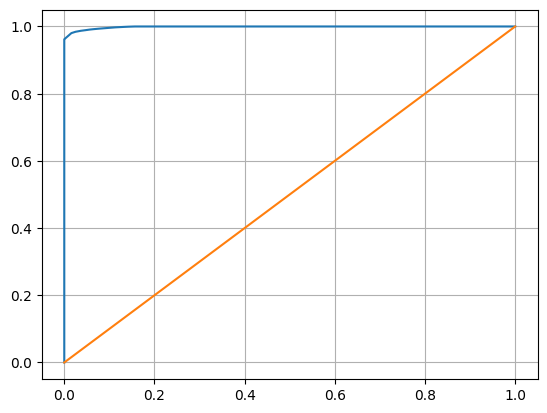

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9809932556713673
The ROC score for TEST data is 0.9749820485202851


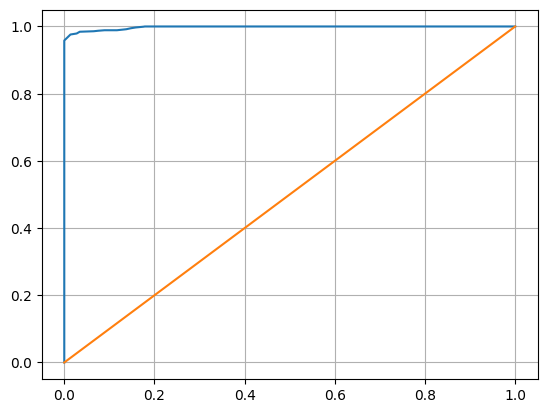

In [22]:
predictor(rf)